<a href="https://colab.research.google.com/github/aghnisyaa/bioactivity_project/blob/main/real_CDD_ML_Part_4_dengue_virus_Regression_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of dengue virus inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
! wget https://raw.githubusercontent.com/aghnisyaa/bioactivity_project/refs/heads/main/dengue_virus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv


--2024-11-30 04:02:46--  https://raw.githubusercontent.com/aghnisyaa/bioactivity_project/refs/heads/main/dengue_virus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134149 (131K) [text/plain]
Saving to: ‘dengue_virus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

dengue_virus_06_bio 100%[===================>] 131.00K  --.-KB/s    in 0.02s   

2024-11-30 04:02:46 (7.98 MB/s) - ‘dengue_virus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [134149/134149]



In [3]:
df = pd.read_csv('dengue_virus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.698970
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.698970
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.698970
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.531653
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.337242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.017729
65,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.602060
66,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.568636
67,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.657577


## **3. Input features**
The ***dengue virus*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [4]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
65,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
66,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
67,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [5]:
Y = df.pIC50
Y

,pIC50
0,2.698970
1,2.698970
2,2.698970
3,3.531653
4,4.337242
...,...
64,6.017729
65,5.602060
66,5.568636
67,5.657577


### **3.3. Let's examine the data dimension**

In [6]:
X.shape

(69, 881)

In [7]:
Y.shape

(69,)

### **3.4. Remove low variance features**

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [9]:
X.shape

(69, 230)

## **4. Data split (80/20 ratio)**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
X_train.shape, Y_train.shape

((55, 230), (55,))

In [12]:
X_test.shape, Y_test.shape

((14, 230), (14,))

## **5. Building a Regression Model using Random Forest**

In [26]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.2387744762419215

In [28]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

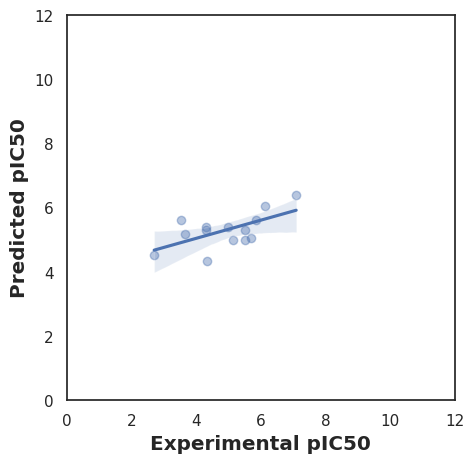

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

# Corrected call to regplot using keyword arguments
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()
